In [12]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


--2023-12-28 14:43:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.74.207, 173.194.192.207, 209.85.146.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.74.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   160MB/s    in 3.1s    

2023-12-28 14:43:25 (160 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
import tensorflow as tf

import os


import zipfile
zipr=zipfile.ZipFile("10_food_classes_all_data.zip","r")
zipr.extractall()
zipr.close()


In [14]:
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

import pathlib
import numpy as np
data_dir =pathlib.Path(train_dir)
class_names=np.array(sorted([     item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)
train_data=train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode="categorical")
test_data=test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=32,class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [16]:
import tensorflow as tf

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
model_1=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")

])
model_1.compile(loss="categorical_crossentropy",
                  optimizer="Adam",
                metrics=["Accuracy"])
model_1.fit(train_data,epochs=10,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/10
 25/235 [==>...........................] - ETA: 18s - loss: 2.7695 - Accuracy: 0.1150

KeyboardInterrupt: ignored

In [17]:
model_1.evaluate(test_data)
model_1.summary()

79/79 [==============================] - 8s 94ms/step - loss: 2.3068 - Accuracy: 0.1200
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                

model is overfitted as slope of **var_loss** is increasing

thus doing **data augmentation**

In [ ]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           width_shift_range=0.2,height_shift_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True)
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="categorical")
model_2=tf.keras.models.clone_model(model_1)
model_2.compile(loss="categorical_crossentropy",
                  optimizer="Adam",
                metrics=["Accuracy"])
model_2.fit(train_data_augmented,epochs=10,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=len(test_data))

In [18]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 10)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 29160)             0         
                                                                 
 dense (Dense)               (None, 10)                2

In [20]:
import matplotlib.image as mpimg

!wget https://www.spendwithpennies.com/wp-content/uploads/2013/10/Crispy-Oven-Fries-SpendWithPennies-23.jpg



--2023-12-28 14:44:18--  https://www.spendwithpennies.com/wp-content/uploads/2013/10/Crispy-Oven-Fries-SpendWithPennies-23.jpg
Resolving www.spendwithpennies.com (www.spendwithpennies.com)... 104.22.8.75, 172.67.11.104, 104.22.9.75, ...
Connecting to www.spendwithpennies.com (www.spendwithpennies.com)|104.22.8.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135437 (132K) [image/jpeg]
Saving to: ‘Crispy-Oven-Fries-SpendWithPennies-23.jpg.1’

Crispy-Oven-Fries-S 100%[===================>] 132.26K  --.-KB/s    in 0.02s   

2023-12-28 14:44:18 (5.85 MB/s) - ‘Crispy-Oven-Fries-SpendWithPennies-23.jpg.1’ saved [135437/135437]



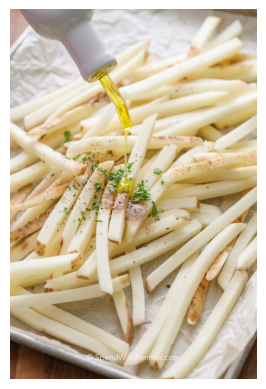

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sampled=mpimg.imread("sample.jpg")
plt.imshow(sampled)
plt.axis(False);

In [22]:
t=tf.image.resize(sampled,size=[224,224])
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [23]:
import numpy as np
exp=tf.expand_dims(t,axis=0)
k=model_1.predict(exp)
class_names[k.argmax()]

1/1 [==============================] - 0s 224ms/step


'grilled_salmon'

not model has very poor accuracy